# TP2 : Extraction d'informations

## 1. Keywords

### Imports

In [207]:
import os
import yake

In [174]:
# Fichiers déjà convertis en Txt

### Extraire les mots clés d'un document avec Yake

In [208]:
# Création d'une liste de mots à ignorer parce qu'ils sont trop généraux étant donné notre corpus
ignored = set(["conseil communal", "conseil général", "bruxelles", "ville", "d'une",
               "mais", "faire", "c'est", "qu'il", "dit", "voir", "d'un", "l'on", 
               "n'est", "serait", "mot", "j'ai", "pris", "suite"])
ignored

{'bruxelles',
 "c'est",
 'conseil communal',
 'conseil général',
 "d'un",
 "d'une",
 'dit',
 'faire',
 "j'ai",
 "l'on",
 'mais',
 'mot',
 "n'est",
 'pris',
 "qu'il",
 'serait',
 'suite',
 'ville',
 'voir'}

In [209]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [210]:
# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

In [211]:
# Enlever les fichiers qui ne commencent pas par Bxl_1889
bxl_files = [f for f in files if f.startswith('Bxl_1889_')]
len(bxl_files)

21

### Récupérer les mots-clés de cette année

In [179]:
for f in sorted(bxl_files):
    text = open(os.path.join(data_path, f), 'r').read()
    keywords = kw_extractor.extract_keywords(text.lower())
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if kw.lower() not in ignored:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

Bxl_1889_Tome_I1_Part_1.txt mentions these keywords: ville de bruxelles, collège, concessionnaire, cahier des charges, théâtre, conseil, charges, commune, canal, cahier, art, canal de charleroi, territoire, bourgmestre, francs, partie, concession, communes, rapport, janvier, point, l'administration, molenbeek, messieurs, directeur, demande, limites, l'administration communale, pourra, charleroi, conditions, boulevard, droit, communal, question, section, limites d'une commune, prix, l'art, parc...
Bxl_1889_Tome_I1_Part_2.txt mentions these keywords: collège, francs, section des finances, conseil, vote d'un crédit, d'un crédit, d'un crédit supplémentaire, messieurs, crédit, section, finances, rapport, dépense, crédit supplémentaire, dépenses, rue, février, l'exercice, frais, d'accord, vote d'un, l'art, mars, gouvernement, somme, propose, hospices, ressources extraordinaires, budget, rapports, travaux, installations maritimes, terrain, crédits, installations, séance, nom du collège, l'ech

In [180]:
#En regardant les mots clés obtenus, on se rend compte qu'il garde beaucoup trop de mots-clés d'un mot qui sont totalement inutiles
#malgré l'élargissement de la liste de mots à ignorer
#Donc j'ai préféré refaire l'étape précédente mais en ne demandant que les bigrammes
for f in sorted(bxl_files):
    text = open(os.path.join(data_path, f), 'r').read()
    keywords = kw_extractor.extract_keywords(text.lower())
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2 and kw.lower() not in ignored:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

Bxl_1889_Tome_I1_Part_1.txt mentions these keywords: l'administration communale...
Bxl_1889_Tome_I1_Part_2.txt mentions these keywords: d'un crédit, crédit supplémentaire, vote d'un, ressources extraordinaires, installations maritimes...
Bxl_1889_Tome_I1_Part_3.txt mentions these keywords: d'une proposition, loi communale, membres présents, jours francs, l'honorable membre, conseils communaux, conseil d'une...
Bxl_1889_Tome_I1_Part_4.txt mentions these keywords: van ysendyck, crédits supplémentaires, conseils communaux, dépenses ordinaires, prochaine séance, terrain rue...
Bxl_1889_Tome_I1_Part_5.txt mentions these keywords: rue neuve, avis favorable, l'echevin janssen, rue auguste, tramways bruxellois, d'un tram, l'honorable membre...
Bxl_1889_Tome_I1_Part_6.txt mentions these keywords: frais d'entretien, l'hôpital saint-jean, l'hôpital saint-pierre, frais imprévus, malades payants, malades indigents, frais d'administration...
Bxl_1889_Tome_I1_Part_7.txt mentions these keywords: legs 

## 2. Nuage de mots

### Imports et stopwords

In [212]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [213]:
# Stopwords
sw = stopwords.words("french")
sw += ["ville", "faire", "commune", "conseil", "est", "une", "pourra", "point",
       "messieurs", "demande", "directeur", "un", "serait", "le", "la", "les", "il", 
       "question", "aussi", "deux", "plus", "dit", "ai", "mais", "une", "on", "cas", "moins",
       "sous", "tout", "cette", "fait", "être", "voir", "vue", "vu", "très", "peut", "quelques",
       "cela", "déjà", "celui", "avoir", "elles", "suite", "contre", "hui", "ceux", "nouveau",
       "leurs", "chaque", "alors", "après", "celle", "donc", "van", "toute", "tous", "encore",
       "mot", "sans", "avant", "entre", "fait", "dont", "cet", "jusqu", "dire", "autres", "etc",
       "faites", "faut", "ainsi", "doit", "trois", "peu", "rien", "comme"]
sw = set(sw)


### Créer un fichier contenant le texte de tous les bulletins de l'année 1889

In [214]:
#Choisir l'année 1889
year = 1889

In [215]:
# Vérifier la longueur de la liste de fichiers de cette année là (comparer avec celle des mots-clés
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len (txts)

21

In [185]:
#Le nombre de fichiers est pareil, maintenant listons les 
txts

['Bxl_1889_Tome_I1_Part_1.txt',
 'Bxl_1889_Tome_I1_Part_2.txt',
 'Bxl_1889_Tome_I1_Part_3.txt',
 'Bxl_1889_Tome_I1_Part_4.txt',
 'Bxl_1889_Tome_I1_Part_5.txt',
 'Bxl_1889_Tome_I1_Part_6.txt',
 'Bxl_1889_Tome_I1_Part_7.txt',
 'Bxl_1889_Tome_I1_Part_8.txt',
 'Bxl_1889_Tome_I2_Part_1.txt',
 'Bxl_1889_Tome_I2_Part_10.txt',
 'Bxl_1889_Tome_I2_Part_11.txt',
 'Bxl_1889_Tome_I2_Part_12.txt',
 'Bxl_1889_Tome_I2_Part_13.txt',
 'Bxl_1889_Tome_I2_Part_2.txt',
 'Bxl_1889_Tome_I2_Part_3.txt',
 'Bxl_1889_Tome_I2_Part_4.txt',
 'Bxl_1889_Tome_I2_Part_5.txt',
 'Bxl_1889_Tome_I2_Part_6.txt',
 'Bxl_1889_Tome_I2_Part_7.txt',
 'Bxl_1889_Tome_I2_Part_8.txt',
 'Bxl_1889_Tome_I2_Part_9.txt']

In [216]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [217]:
# Compter le nombre d'éléments (=fichiers) dans la liste (pour vérifier que les 21 fichiers sont bien dedans)
len(content_list)

21

In [200]:
# Ecrire tout le contenu dans un fichier temporaire (appelé 'an' ici)
temp_path = '../data/an'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [201]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

'V I L L E\n\nD E\n\nB R U X E L L E S .\n\nBULLETIN\n\nCOMMUNAL\n\nA N N É E\n\n1889.\n\nPREMIÈRE\n\nPARTIE.\n\nTOME\n\nCOMPTE\n\nRENDU\n\nI.\n\nDES\n\nSÉANCES.\n\nBRUXELLES,\nIMPRIMERIE\n\nDE V\n\nv e\n\nJULIEN\n\nBAEilTSOEN ,\nT\n\n1889\n\n8UCG*\n\nDE\n\n30L3-WITTOUCK.\n\n\x0c\x0cN ° 1.\n\nCOMPTE RENDU DE L A S É A N C E DÛ 21 J A N V I E R\n\nVILLE\n\nDE\n\nBULLETIN\n\nBRUXELLES.\n\nCOMMUNAL\n\nA N N . É E\n\nC O N S E I L\n\n1889.\n\n1889.\n\nC O M M U N A L .\n\nSéance du 21 Janvier 1889.\nPrésidence de AI. BULS,\n\nBourgmestre.\n\nSOMMAIRE :\n\n1. Communications.\n2. Conseil '

In [70]:
#Vu l'état du texte, il est important de nettoyer tous ces déchets

### Nettoyer le fichier à l'aide d'une fonction de nettoyage

#### Créer la fonction nettoyage

In [202]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

#### Appliquer la fonction sur le fichier complet de l'année

In [203]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/an/1889_clean.txt!'

In [204]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'bulletin communal première partie tome compte rendu séances bruxelles imprimerie julien baeiltsoen wittouck compte rendu bulletin bruxelles communal séance janvier présidence buls bourgmestre sommaire communications communal composition sections personnel administration vote délégation donner collège nomination certains emplois hospices approbation actes divers administration hospices échange terrain quartier adoption église béguinage location avis favorable cimetière concessions sépulture accco'

### Nuage de mots

#### Afficher les termes les plus fréquents

In [205]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('francs', 2445), ('rue', 1604), ('collège', 1267), ('art', 1231), ('frais', 1213), ('bruxelles', 937), ('service', 874), ('total', 862), ('echevin', 812), ('travaux', 746)]


#### Créer, stocker et afficher le nuage de mots

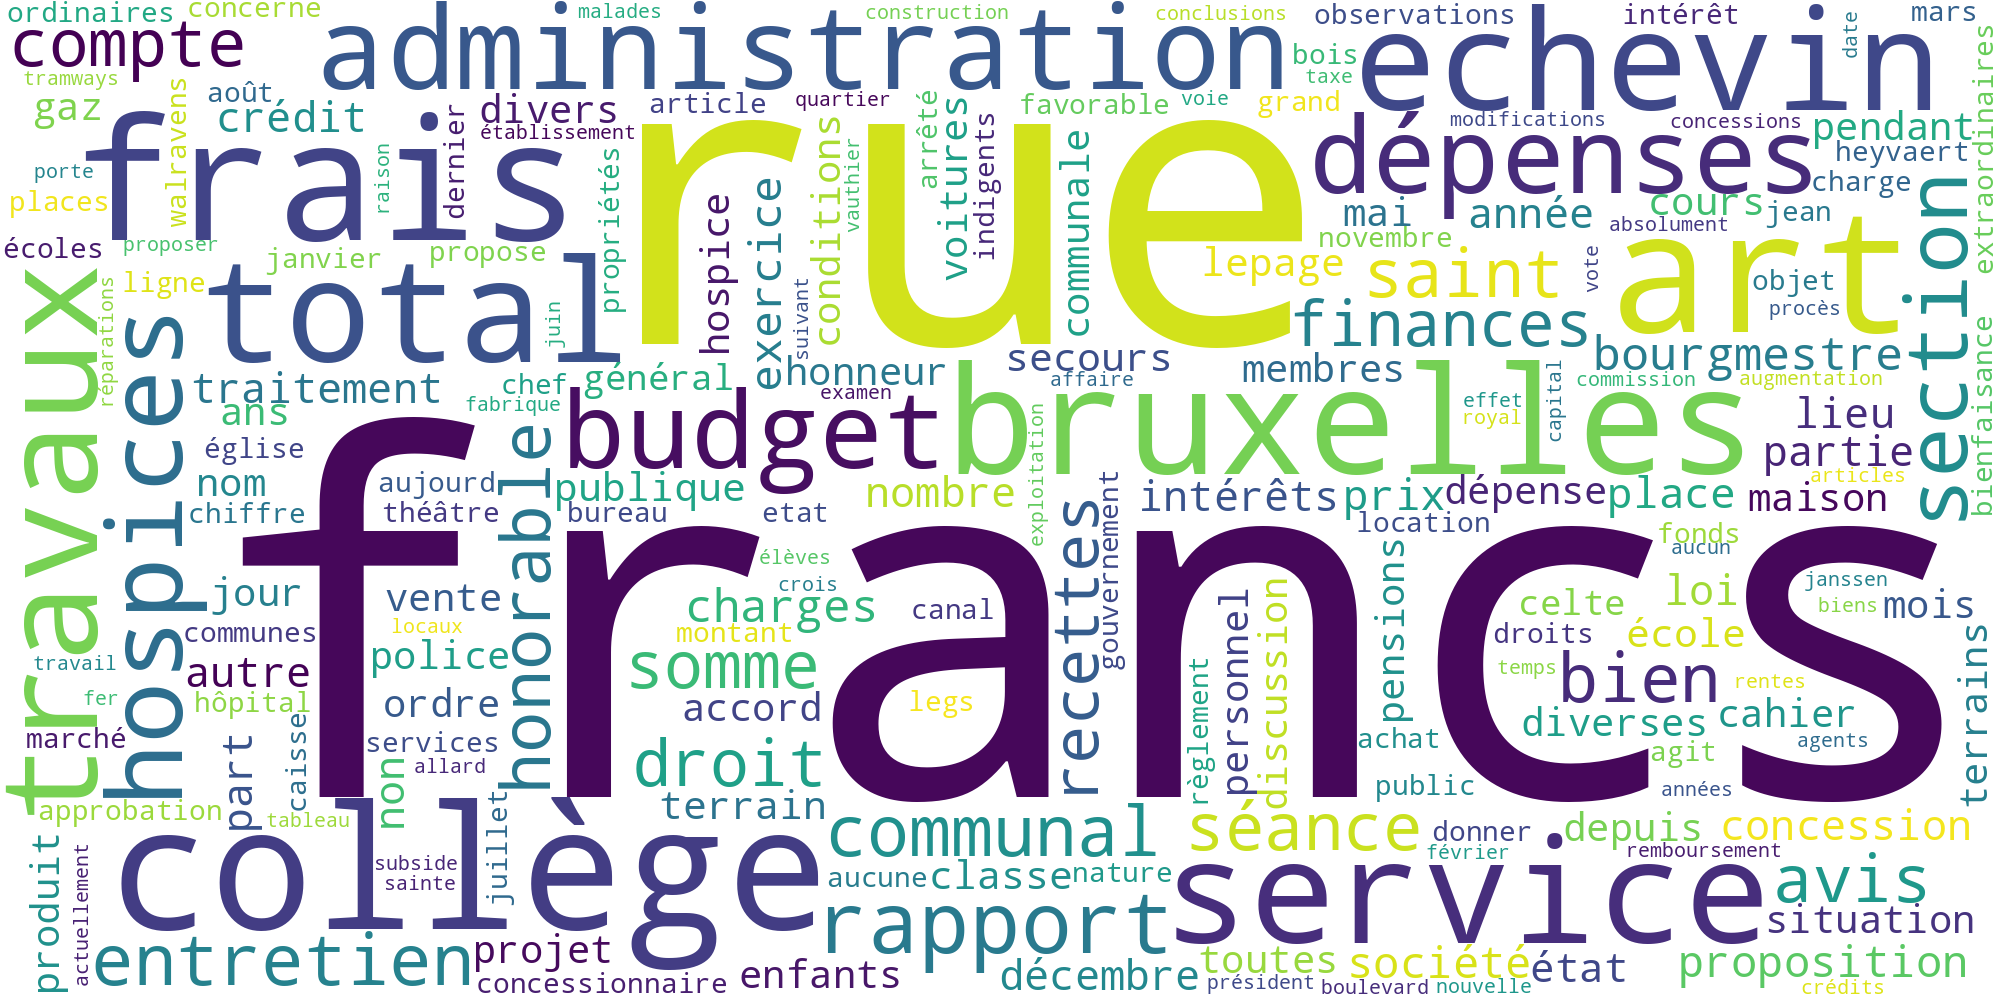

In [206]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

## Reconnaissance d'entités nommées avec SpaCy

### Imports

In [100]:
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

In [101]:
nlp = spacy.load('fr_core_news_md')

### Reconnaissance d'entités nommées pour l'année 1889

In [108]:
# Charger le texte
n
text = open("../data/an/1889.txt", encoding='utf-8').read()[:n]

In [109]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: user 1min 8s, sys: 29.5 s, total: 1min 38s
Wall time: 1min 40s


In [111]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [112]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

Messieurs apparait 149 fois dans le corpus
Bourgmestre apparait 43 fois dans le corpus
q u i apparait 39 fois dans le corpus
De Mot apparait 28 fois dans le corpus
Lepage apparait 26 fois dans le corpus
M. le Bourgmestre apparait 24 fois dans le corpus
Vauthier apparait 22 fois dans le corpus
Depaire apparait 19 fois dans le corpus
q u ' i apparait 19 fois dans le corpus
Weber apparait 18 fois dans le corpus
Echevin apparait 18 fois dans le corpus
Adoption apparait 17 fois dans le corpus
Echevin Janssen apparait 16 fois dans le corpus
Janssen apparait 13 fois dans le corpus
Doucet apparait 12 fois dans le corpus
Echevins apparait 12 fois dans le corpus
Heyvaert apparait 11 fois dans le corpus
q u e apparait 11 fois dans le corpus
Martiny apparait 11 fois dans le corpus
Becquet apparait 11 fois dans le corpus
Goffin apparait 10 fois dans le corpus
p r é apparait 10 fois dans le corpus
Echevin Walravens apparait 10 fois dans le corpus
Allard apparait 10 fois dans le corpus
Godefroy appar

## Sentiment analysis avec Textblob-FR

### Imports

In [113]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

### Fonction

In [121]:
this_text = '../data/an/1889.txt'

In [114]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

### Analyser le sentiment de 10 phrases

In [115]:
#1
get_sentiment("Ce crédit permettra également d'entamer les travaux de construction.")

This text is 20% positive and 0.35% subjective.


In [116]:
#2
get_sentiment("Le rideau métallique prévu au budget de 1889 n'est pas encore commandé.")

This text is neutral and perfectly objective.


In [117]:
#3
get_sentiment("A l'école des Beaux-Arts de la ville de Bruxelles une somme de 25,000 francs pour la fondation d'un prix annuel à décerner au concours de paysage.") 

This text is 20% positive and 0.2% subjective.


In [119]:
#4
get_sentiment("Les annuités précédentes ont été portées en recelte extraordinaire en dehors des budgets des exercices 1885 a 1889.")

This text is 5% positive and 0.4% subjective.


In [120]:
#5
get_sentiment("Nos limites cependant ne sont pas encore tracées d'une manière légale sur tous les points du périmètre de la commune, mais nous sommes d'accord avec MoIenbeek-Saint-àean pour réclamer l'intervention de l'Autorité s u p é rieure sur la fixation du Lenitoire, depuis le théâtre des Nouveautés jusqu'à la porte de Ninove; nous comptons obtenir en 1852 une loi qui prévienne toute erreur, toute contestation dans l'avenir.")

This text is 12% positive and 0.030000000000000006% subjective.


In [124]:
#6
get_sentiment("En conséquence, Messieurs, nous vous demandons à notre tour l'autonsalion nécessaire aux fins de poursuivre ce résultat devant l'Autorité supérieure.")

This text is 19% positive and 0.25% subjective.


In [130]:
#7
get_sentiment("M. le Bourgmestre. Le Conseil ne peut se prononcer que sur une proposition écrite.")

This text is neutral and perfectly objective.


In [131]:
#8
get_sentiment("Le concessionnaire ne pourra, sans l'autorisation du Collège, remiser les décors dans d'autres locaux que ceux misa sa disposition par la Ville.")

This text is 5% negative and perfectly objective.


In [133]:
#9
get_sentiment("Toute contravention aux dispositions du présent article entraînera, à charge du concessionnaire, une retenue de 100 francs, sans préjudice de dommages-intérêts.")

This text is 18% positive and 0.15% subjective.


In [134]:
#1O
get_sentiment("En cas de destruction totale ou partielle du théâtre,par quelque cause que ce soit, la Ville ne sera tenue ni à lareconstruction de l'édifice, ni à la restauration ou au remplacement des objets incendiés ou détruits, ni à aucun dédommagement quelconque.")

This text is 2% negative and 0.03333333333333333% subjective.
